In [5]:
import pandas as pd

url = 'https://raw.githubusercontent.com/nangdypanhar/DataScienceProject/main/diabetes_prediction_dataset.csv'

df = pd.read_csv(url)
print(df.head())


   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [6]:
df.shape

(100000, 9)

In [7]:
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [10]:
#search if there is some null value
df.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [11]:
#duplicate row
duplicate_rows = df[df.duplicated()]

# Print the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
       gender   age  hypertension  heart_disease smoking_history    bmi  \
2756     Male  80.0             0              0         No Info  27.32   
3272   Female  80.0             0              0         No Info  27.32   
3418   Female  19.0             0              0         No Info  27.32   
3939   Female  78.0             1              0          former  27.32   
3960     Male  47.0             0              0         No Info  27.32   
...       ...   ...           ...            ...             ...    ...   
99980  Female  52.0             0              0           never  27.32   
99985    Male  25.0             0              0         No Info  27.32   
99989  Female  26.0             0              0         No Info  27.32   
99990    Male  39.0             0              0         No Info  27.32   
99995  Female  80.0             0              0         No Info  27.32   

       HbA1c_level  blood_glucose_level  diabetes  
2756           6.6             

In [12]:
# To remove duplicate rows:
df.drop_duplicates(inplace=True)
df.shape

(96146, 9)

In [13]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


In [14]:
#check gender and smoking_history distinct values
print(df['gender'].unique())
print(df['smoking_history'].unique())


['Female' 'Male' 'Other']
['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [15]:
# Remove Unneccessary value
df = df[df['gender'] != 'Other']
print(df['gender'].unique())

['Female' 'Male']


In [16]:
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past-smoker'

# Apply the function to the 'smoking_history' column
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(df['smoking_history'].value_counts())

smoking_history
non-smoker     67276
past-smoker    19655
current         9197
Name: count, dtype: int64


In [20]:
data = df.copy()
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,non-smoker,25.19,6.6,140,0
1,Female,54.0,0,0,non-smoker,27.32,6.6,80,0
2,Male,28.0,0,0,non-smoker,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,non-smoker,24.60,4.8,145,0
99996,Female,2.0,0,0,non-smoker,17.37,6.5,100,0
99997,Male,66.0,0,0,past-smoker,27.83,5.7,155,0
99998,Female,24.0,0,0,non-smoker,35.42,4.0,100,0


In [21]:
def perform_one_hot_encoding_heat_map(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Ensure the dummy columns are in 0 and 1 format (not True and False)
    dummies = dummies.astype(int)

    # Drop the original column and append the new dummy columns to the dataframe
    data = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return data

# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding_heat_map(data, 'gender')

# Perform one-hot encoding on the smoking history variable
data = perform_one_hot_encoding_heat_map(data, 'smoking_history')

# After transformation, check the column names
print(data.columns)


Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Female', 'gender_Male',
       'smoking_history_current', 'smoking_history_non-smoker',
       'smoking_history_past-smoker'],
      dtype='object')


In [22]:
data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_current,smoking_history_non-smoker,smoking_history_past-smoker
0,80.0,0,1,25.19,6.6,140,0,1,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,1,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,36.0,0,0,24.60,4.8,145,0,1,0,0,1,0
99996,2.0,0,0,17.37,6.5,100,0,1,0,0,1,0
99997,66.0,0,0,27.83,5.7,155,0,0,1,0,0,1
99998,24.0,0,0,35.42,4.0,100,0,1,0,0,1,0


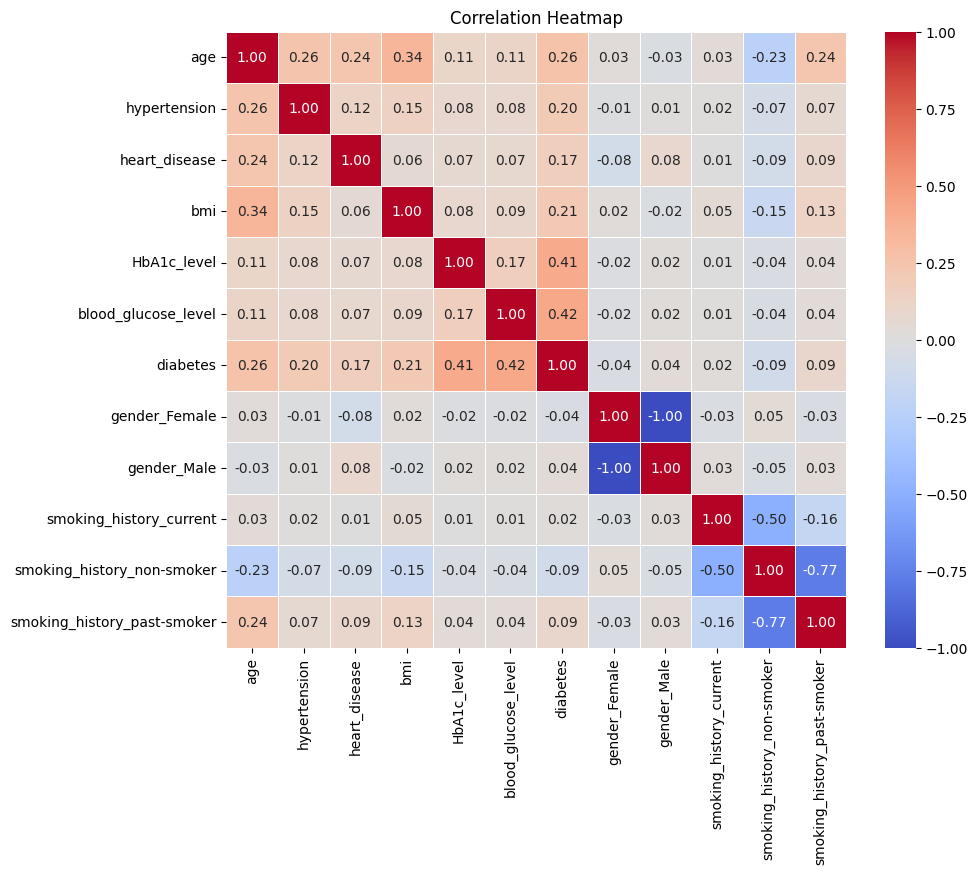

In [ ]:

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix using only numeric columns
correlation_matrix = numeric_data.corr()

# Step 5: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [24]:
# Encode for DF use for training
def perform_one_hot_encoding(df, column_name, is_binary=False):
    # Perform one-hot encoding on the specified column
    if is_binary:
        # For gender, create a binary column where 1 represents female and 0 represents male
        df[column_name] = (df[column_name] == 'Female').astype(int)
    else:
        # For other columns, perform one-hot encoding (separate columns for each category)
        dummies = pd.get_dummies(df[column_name], prefix=column_name).astype(int)
        df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

df = perform_one_hot_encoding(df, 'smoking_history')
df = perform_one_hot_encoding(df, 'gender', is_binary=True)

df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_non-smoker,smoking_history_past-smoker
0,1,80.0,0,1,25.19,6.6,140,0,0,1,0
1,1,54.0,0,0,27.32,6.6,80,0,0,1,0
2,0,28.0,0,0,27.32,5.7,158,0,0,1,0
3,1,36.0,0,0,23.45,5.0,155,0,1,0,0
4,0,76.0,1,1,20.14,4.8,155,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99994,1,36.0,0,0,24.60,4.8,145,0,0,1,0
99996,1,2.0,0,0,17.37,6.5,100,0,0,1,0
99997,0,66.0,0,0,27.83,5.7,155,0,0,0,1
99998,1,24.0,0,0,35.42,4.0,100,0,0,1,0


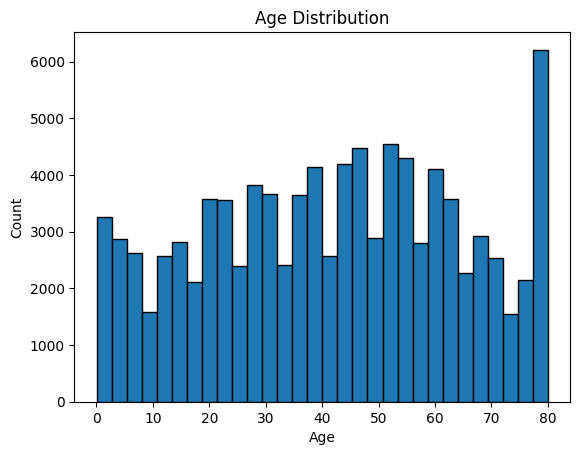

In [26]:
#Histogram for age
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


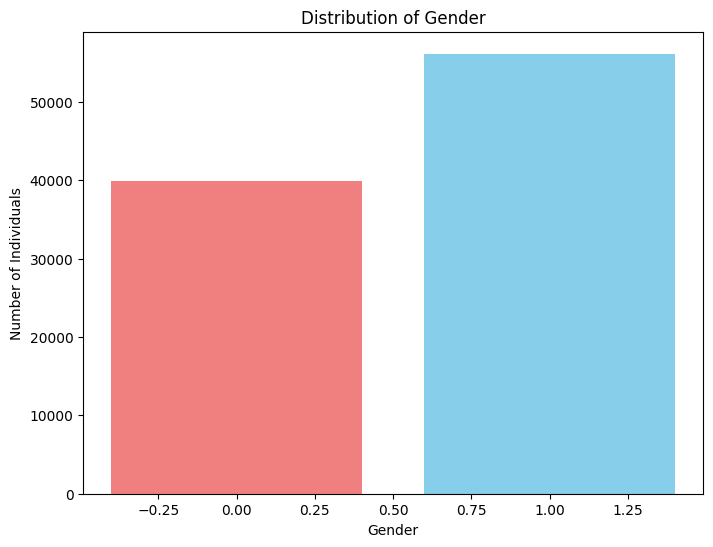

In [27]:
#bar plot for gender
gender_counts = df['gender'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'lightcoral'])
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Individuals')
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14048\609572678.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'], kde=True)  # kde=True adds a kernel density estimate


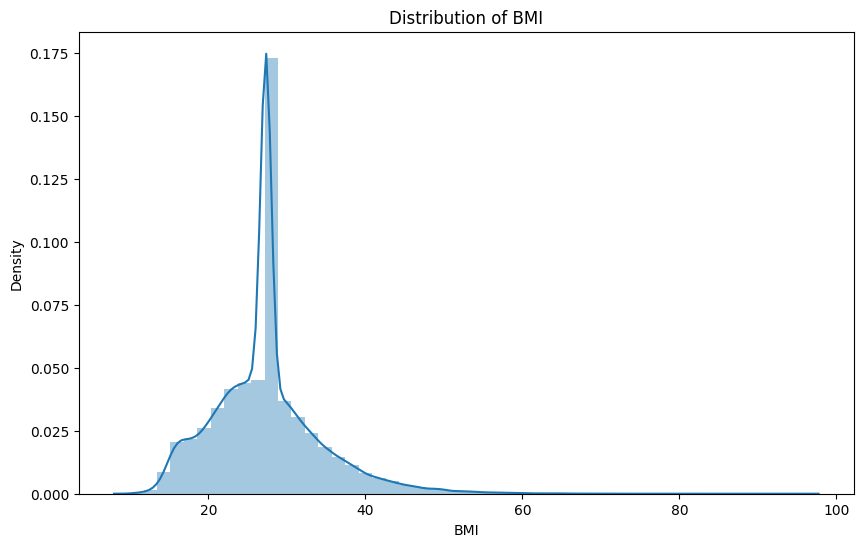

In [31]:
# Distribution plot for BMI
plt.figure(figsize=(10, 6))
sns.distplot(df['bmi'], kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()


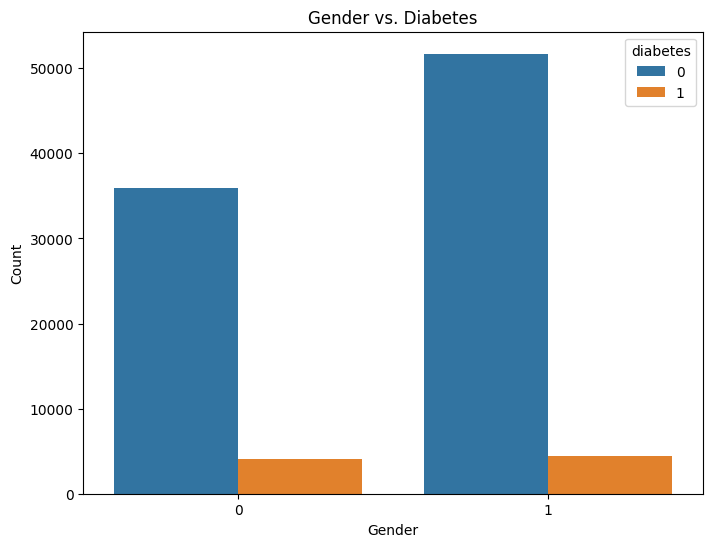

In [32]:

#Count plot of gender vs diabetes
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs. Diabetes')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


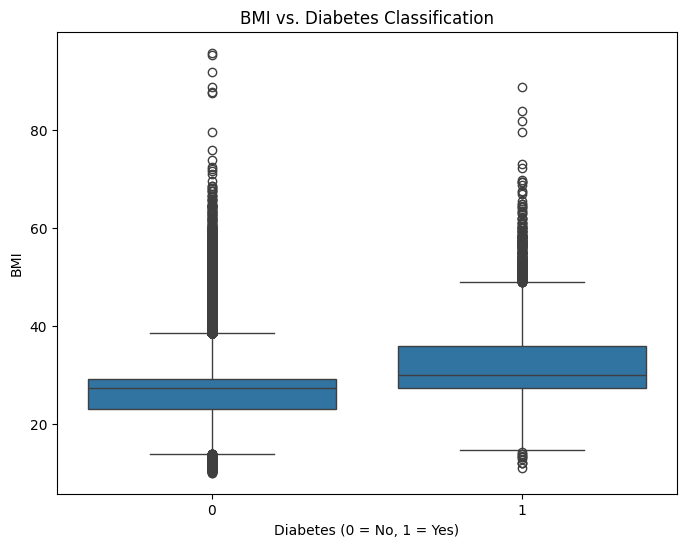

In [33]:
#Boxplot BMI vs Diabetes classification

plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs. Diabetes Classification')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()


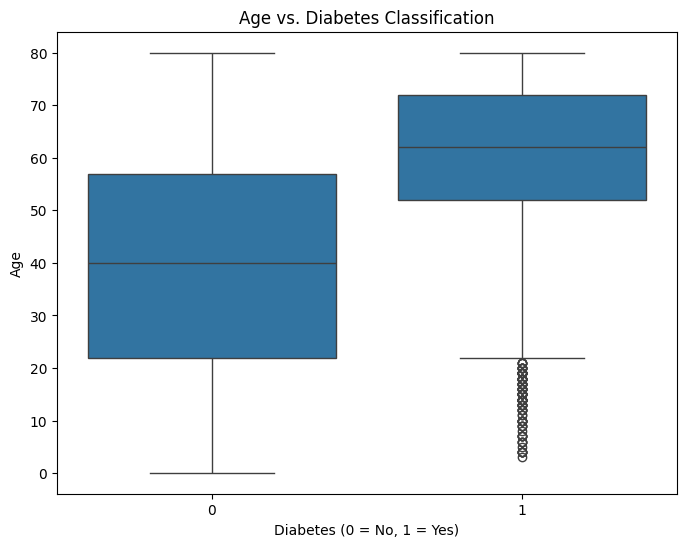

In [34]:
#Boxplot Age vs Diabetes classification

plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs. Diabetes Classification')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


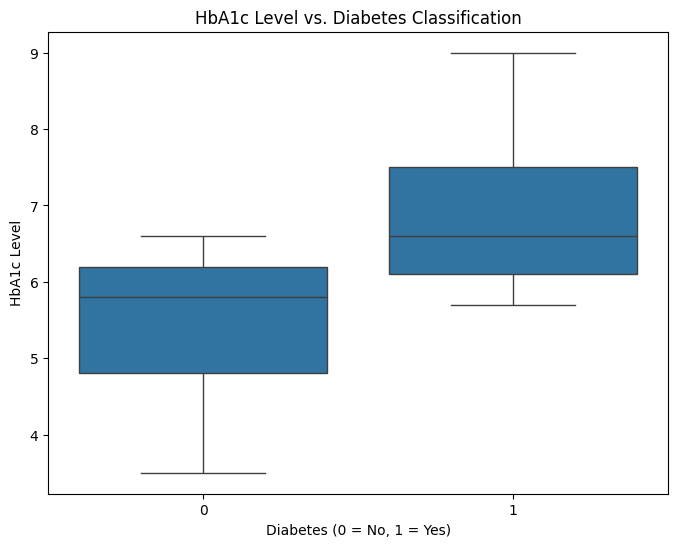

In [35]:
#Boxplot HbA1c level vs Diabetes classification

plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c Level vs. Diabetes Classification')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('HbA1c Level')
plt.show()


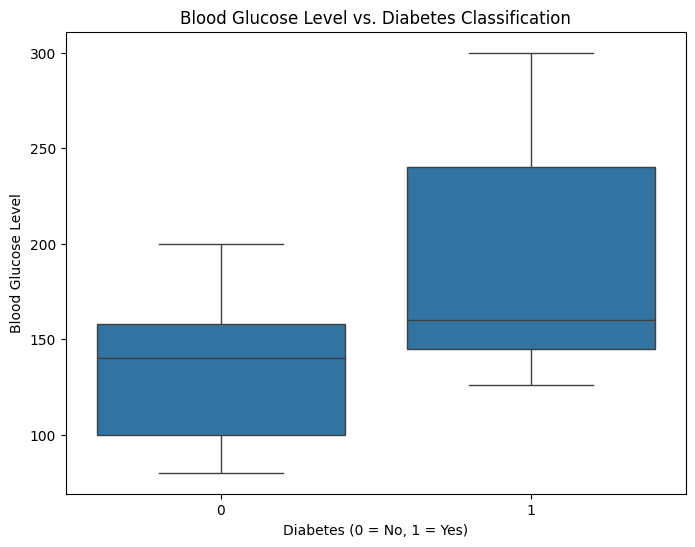

In [36]:
#Boxplot blood glucose level vs Diabetes classification

plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs. Diabetes Classification')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Blood Glucose Level')
plt.show()


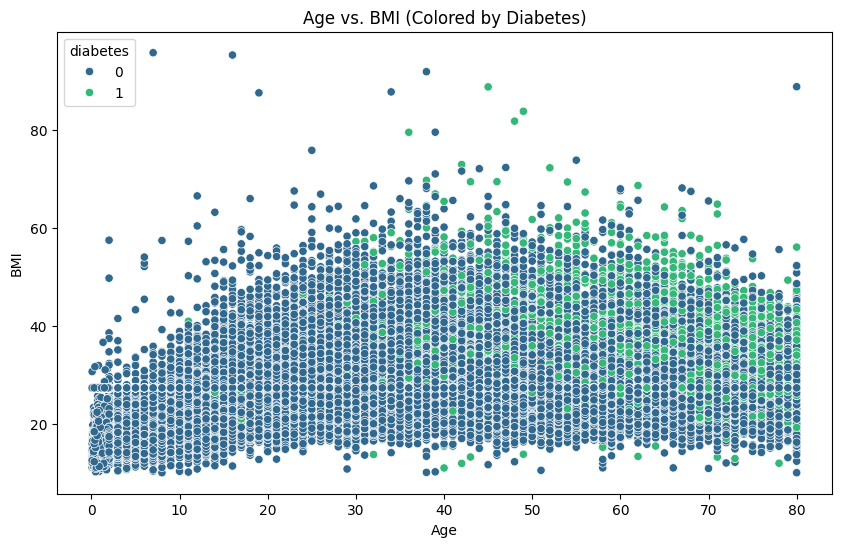

In [37]:
#Scatterplot Age vs BMI colored by Diabetes classification
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df, palette='viridis')
plt.title('Age vs. BMI (Colored by Diabetes)')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()


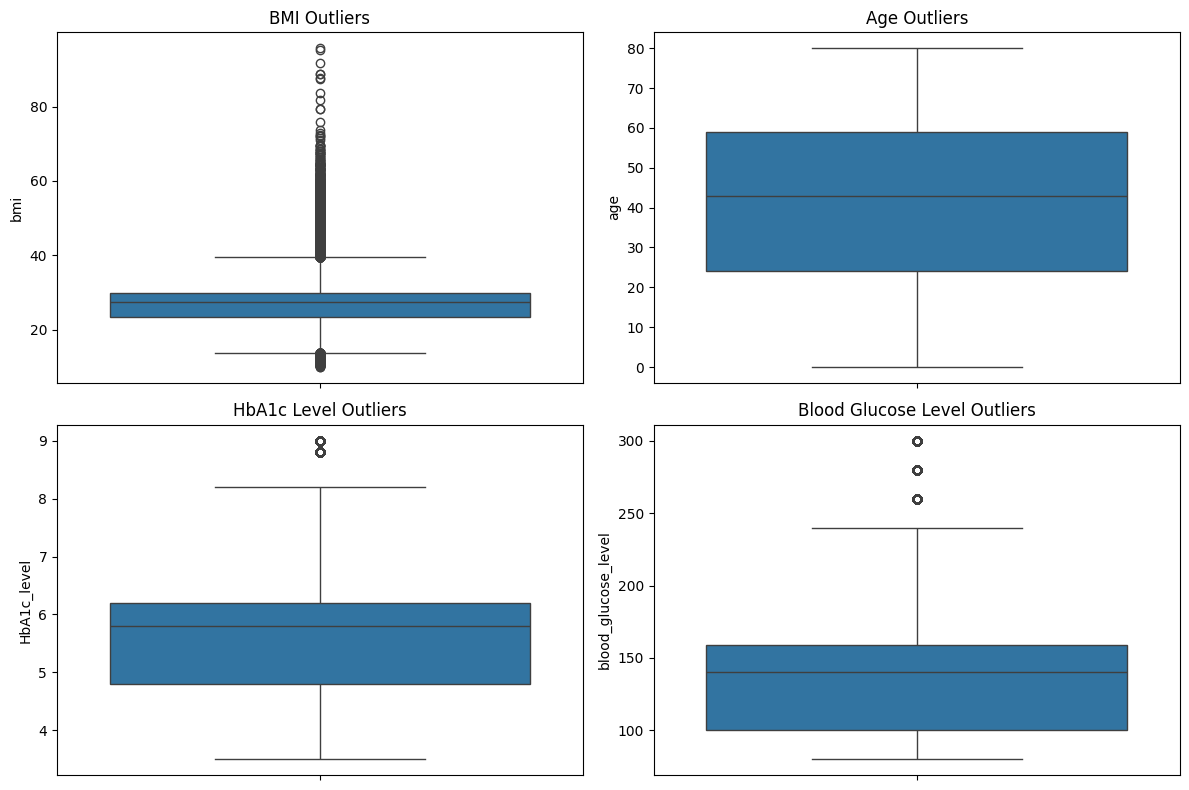

In [38]:
#print outlier in graph

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(y='bmi', data=df)
plt.title('BMI Outliers')

plt.subplot(2, 2, 2)
sns.boxplot(y='age', data=df)
plt.title('Age Outliers')

plt.subplot(2, 2, 3)
sns.boxplot(y='HbA1c_level', data=df)
plt.title('HbA1c Level Outliers')

plt.subplot(2, 2, 4)
sns.boxplot(y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level Outliers')

plt.tight_layout()
plt.show()


In [39]:
#BMI Outliers
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outlier BMI values
bmi_outliers = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]['bmi']

# Print outlier BMI values
print("Outlier BMI values:")
bmi_outliers


Outlier BMI values:


11       54.70
39       56.43
59       63.48
93       55.61
98       50.13
         ...  
99933    13.34
99948    39.62
99953    60.52
99960    45.15
99993    40.69
Name: bmi, Length: 5354, dtype: float64

In [40]:
#remove bmi outliers

df_no_outliers = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]

print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", df_no_outliers.shape)

df = df_no_outliers


Shape before removing outliers: (96128, 11)
Shape after removing outliers: (90774, 11)


In [41]:
#Age Outliers

Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Define upper and lower bounds for age outliers
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# Identify outlier age values
age_outliers = df[(df['age'] < lower_bound_age) | (df['age'] > upper_bound_age)]['age']

# Print outlier age values
print("Outlier Age values:")
age_outliers

Outlier Age values:


Series([], Name: age, dtype: float64)

In [42]:
#HbA1c Level Outliers

Q1_hba1c = df['HbA1c_level'].quantile(0.25)
Q3_hba1c = df['HbA1c_level'].quantile(0.75)
IQR_hba1c = Q3_hba1c - Q1_hba1c

# Define upper and lower bounds for HbA1c_level outliers
lower_bound_hba1c = Q1_hba1c - 1.5 * IQR_hba1c
upper_bound_hba1c = Q3_hba1c + 1.5 * IQR_hba1c

# Identify outlier HbA1c_level values
hba1c_outliers = df[(df['HbA1c_level'] < lower_bound_hba1c) | (df['HbA1c_level'] > upper_bound_hba1c)]['HbA1c_level']

# Print outlier HbA1c_level values
print("Outlier HbA1c_level values:")
hba1c_outliers


Outlier HbA1c_level values:


40       9.0
55       9.0
135      9.0
169      9.0
299      9.0
        ... 
99523    8.8
99663    9.0
99706    9.0
99740    9.0
99929    8.8
Name: HbA1c_level, Length: 1145, dtype: float64

In [43]:

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['HbA1c_level'].quantile(0.25)
Q3 = df['HbA1c_level'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define the lower and upper bound (1.5 * IQR rule)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print bounds for verification
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Remove outliers
df_no_outliers = df[(df['HbA1c_level'] >= lower_bound) & (df['HbA1c_level'] <= upper_bound)]

# Print before and after shape
print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", df_no_outliers)




Lower Bound: 2.6999999999999993, Upper Bound: 8.3
Shape before removing outliers: (90774, 11)
Shape after removing outliers:        gender   age  hypertension  heart_disease    bmi  HbA1c_level  \
0           1  80.0             0              1  25.19          6.6   
1           1  54.0             0              0  27.32          6.6   
2           0  28.0             0              0  27.32          5.7   
3           1  36.0             0              0  23.45          5.0   
4           0  76.0             1              1  20.14          4.8   
...       ...   ...           ...            ...    ...          ...   
99994       1  36.0             0              0  24.60          4.8   
99996       1   2.0             0              0  17.37          6.5   
99997       0  66.0             0              0  27.83          5.7   
99998       1  24.0             0              0  35.42          4.0   
99999       1  57.0             0              0  22.43          6.6   

       blo

In [45]:
df = df_no_outliers
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_non-smoker,smoking_history_past-smoker
0,1,80.0,0,1,25.19,6.6,140,0,0,1,0
1,1,54.0,0,0,27.32,6.6,80,0,0,1,0
2,0,28.0,0,0,27.32,5.7,158,0,0,1,0
3,1,36.0,0,0,23.45,5.0,155,0,1,0,0
4,0,76.0,1,1,20.14,4.8,155,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99994,1,36.0,0,0,24.60,4.8,145,0,0,1,0
99996,1,2.0,0,0,17.37,6.5,100,0,0,1,0
99997,0,66.0,0,0,27.83,5.7,155,0,0,0,1
99998,1,24.0,0,0,35.42,4.0,100,0,0,1,0


In [47]:


# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['blood_glucose_level'].quantile(0.25)
Q3 = df['blood_glucose_level'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define the lower and upper bound (1.5 * IQR rule)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print bounds for verification
print(f"Blood Glucose: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")

# Remove outliers
df_no_outliers = df[(df['blood_glucose_level'] >= lower_bound) & (df['blood_glucose_level'] <= upper_bound)]

# Print before and after shape
print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", df_no_outliers.shape)



Blood Glucose: Lower Bound = 11.5, Upper Bound = 247.5
Shape before removing outliers: (89629, 11)
Shape after removing outliers: (88177, 11)


In [48]:
df_no_outliers
df = df_no_outliers
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_non-smoker,smoking_history_past-smoker
0,1,80.0,0,1,25.19,6.6,140,0,0,1,0
1,1,54.0,0,0,27.32,6.6,80,0,0,1,0
2,0,28.0,0,0,27.32,5.7,158,0,0,1,0
3,1,36.0,0,0,23.45,5.0,155,0,1,0,0
4,0,76.0,1,1,20.14,4.8,155,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99994,1,36.0,0,0,24.60,4.8,145,0,0,1,0
99996,1,2.0,0,0,17.37,6.5,100,0,0,1,0
99997,0,66.0,0,0,27.83,5.7,155,0,0,0,1
99998,1,24.0,0,0,35.42,4.0,100,0,0,1,0


Class Distribution:
diabetes
0    83559
1     4618
Name: count, dtype: int64

Class Percentages:
diabetes
0    94.762807
1     5.237193
Name: count, dtype: float64


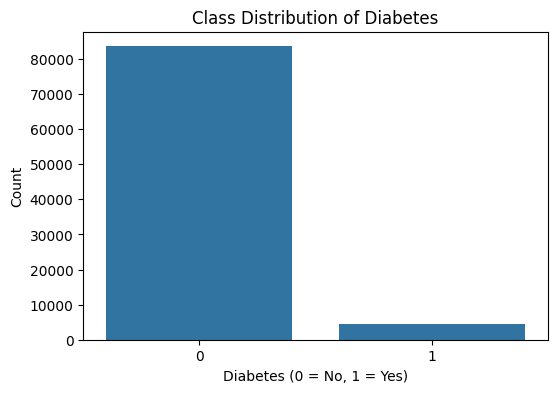


The data is imbalanced.


In [50]:
# check if the data is imbalance

# Calculate the class distribution
class_counts = df['diabetes'].value_counts()

# Print the class distribution
print("Class Distribution:")
print(class_counts)

# Calculate the percentage of each class
class_percentages = class_counts / len(df) * 100

# Print the class percentages
print("\nClass Percentages:")
print(class_percentages)

# Visualize the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes', data=df)
plt.title('Class Distribution of Diabetes')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Check if the data is imbalanced (e.g., if one class is significantly smaller than the other)
if class_percentages.min() < 30:  # You can adjust this threshold as needed
  print("\nThe data is imbalanced.")
else:
  print("\nThe data is relatively balanced.")


Before limiting:
 diabetes
0    83559
1     4618
Name: count, dtype: int64

After limiting:
 diabetes
0    10000
1     4618
Name: count, dtype: int64


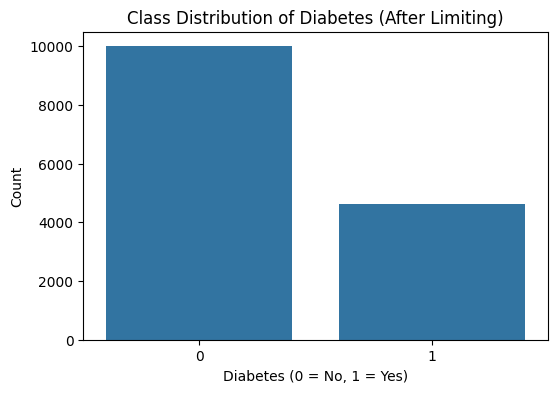

In [52]:
# Split data and limit the class distribution as before

# Count the number of rows for each class
class_counts = df['diabetes'].value_counts()
print("Before limiting:\n", class_counts)

# Limit the number of rows where diabetes == 0 to 10,000
df_0 = df[df['diabetes'] == 1]  # Keep all rows where diabetes == 1
df_1 = df[df['diabetes'] == 0].sample(n=10000, random_state=42)  # Limit to 10,000 samples

# Combine the new dataset
df_limited = pd.concat([df_0, df_1])

# Count the new class distribution
new_class_counts = df_limited['diabetes'].value_counts()
print("\nAfter limiting:\n", new_class_counts)

# Store the new limited dataset in a variable
df_new_data = df_limited

# Visualize the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes', data=df_limited)
plt.title('Class Distribution of Diabetes (After Limiting)')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# df_new_data now contains the limited dataset


In [53]:
df_limited.shape
df = df_limited

Class distribution after SMOTE: Counter({1: 10000, 0: 10000})


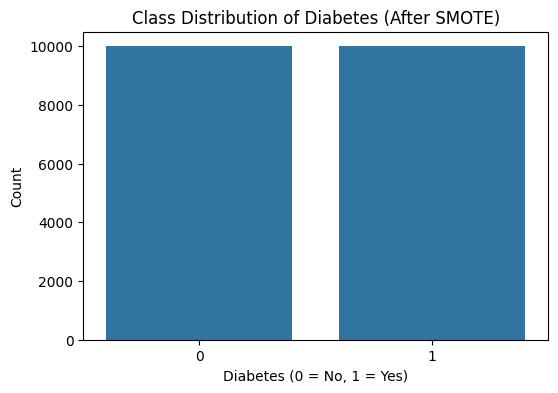

In [58]:
# Split the data into features (X) and target (y) from df_encode
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Initialize SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the class distribution after applying SMOTE
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_resampled))

# Combine the resampled data back into a DataFrame (if necessary)
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['diabetes'] = y_resampled

# Visualize the class distribution after applying SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes', data=df_resampled)
plt.title('Class Distribution of Diabetes (After SMOTE)')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


Class distribution after undersampling: Counter({0: 4618, 1: 4618})


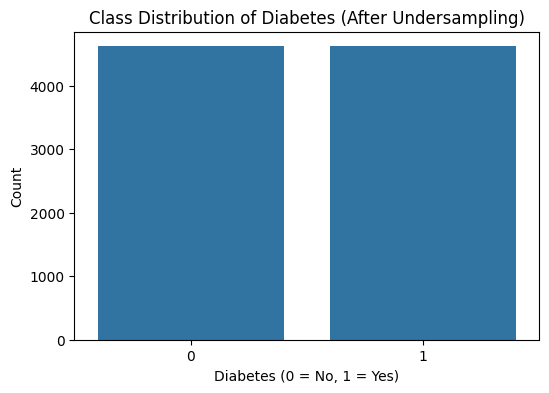

In [59]:
# Split the data into features (X) and target (y) from df
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Import necessary libraries for undersampling
from sklearn.utils import resample
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Combine X and y into one DataFrame for resampling
df_combined = pd.concat([X, y], axis=1)

# Separate the majority and minority classes
df_majority = df_combined[df_combined['diabetes'] == 0]  # Majority class
df_minority = df_combined[df_combined['diabetes'] == 1]  # Minority class

# Undersample the majority class
df_majority_undersampled = resample(df_majority,
                                    replace=False,    # No replacement
                                    n_samples=len(df_minority),  # Match minority class samples
                                    random_state=42)  # For reproducibility

# Combine the undersampled majority class with the minority class
df_resampled_undersample = pd.concat([df_majority_undersampled, df_minority])

# Separate features and target again after undersampling
X_resampled_undersample = df_resampled_undersample.drop('diabetes', axis=1)
y_resampled_undersample = df_resampled_undersample['diabetes']

# Print the class distribution after undersampling
print("Class distribution after undersampling:", Counter(y_resampled_undersample))

# Visualize the class distribution after applying undersampling
plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes', data=df_resampled_undersample)
plt.title('Class Distribution of Diabetes (After Undersampling)')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


In [60]:
# undersample data
df_resampled_undersample.shape


(9236, 11)

In [61]:
#$ oversample data
df_resampled.shape

(20000, 11)

In [62]:
df_resampled.to_csv('oversampling_diabetes_data.csv', index=False)
df_resampled_undersample.to_csv('undersampling_diabetes_data.csv', index=False)
df.to_csv('cleaned_diabetes_data.csv' , index=False)
